In [6]:
import astropy.constants as const
import astropy.units as u
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from plotting import label_axes

In [7]:
from typing import cast
from astropy.cosmology import WMAP9 as cosmo
from astropy.cosmology import Cosmology

cosmo = cast(Cosmology, cosmo)


def integrand(z: float) -> float:
    return (
        (1 / (cosmo.H0 * (1 + z) * np.sqrt((1 + z) ** 3 * cosmo.Om0 + cosmo.Ode0)))
        .to(u.Myr)
        .value
    )

In [8]:
from scipy import integrate

def t(z: float) -> float:
    res, tol = integrate.quad(integrand, z, np.inf)
    return res * u.Myr

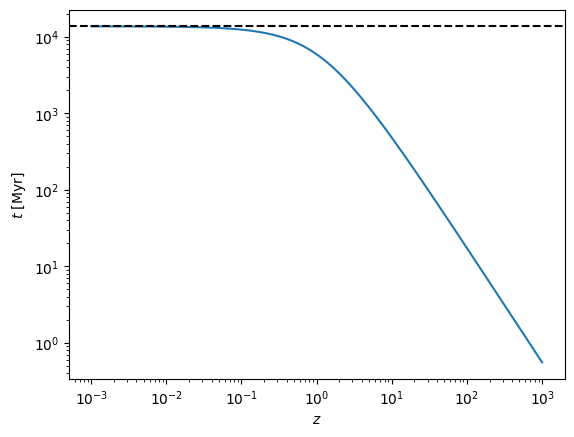

In [10]:
fig, ax = plt.subplots()

z_grid = np.logspace(-3, 3, 300)
ax.loglog(z_grid, u.Quantity([t(z) for z in z_grid]))
ax.axhline(13.787 * u.Gyr, color="k", linestyle="--")
label_axes(ax, "z", "t")
plt.show()